In [10]:
import pandas as pd
import tqdm
import datetime
df = pd.read_csv("./daily/stock_2025-01-02.csv")
cdf = pd.read_csv("stock_today.csv")
fdf = pd.read_csv("./daily/stock_fund_2025-01-02.csv")
cfdf = pd.read_csv("stock_fund_today.csv")
fdf = pd.concat([fdf,cfdf])
df = pd.concat([df,cdf])
df = df.merge(fdf)


def make_record(g):
    if g.shape[0]>=10:
        name = g.iloc[0]["name"]
        last_1day, last_3_days, last_7days = g.iloc[0], g.iloc[1:3], g.iloc[5:]
        last_7day_volume = last_7days.volume.mean()
        last_3day_volume = last_3_days.volume.mean()/last_7day_volume
        last_1day_volume = last_1day.volume/last_7day_volume
        last_3day_vchange = g.iloc[2].volume/g.iloc[1].volume
        last_2day_vchange = g.iloc[1].volume/g.iloc[2].volume
        last_1day_vchange = last_1day.volume/g.iloc[1].volume
        last_1day_gap = (g.close.max()-g.iloc[0].close)/last_7days.close.mean()
        last_7day_change = g.iloc[3].close/g.iloc[-1].close
        last_3day_change = g.iloc[2].close/g.iloc[3].close
        last_2day_change = g.iloc[1].close/g.iloc[2].close
        last_1day_change = g.iloc[0].close/g.iloc[1].close
        last_1day_cc = (last_1day.close/last_1day.open-1)*100
        last_1day_cm = ((last_1day.high-last_1day.close)/g.iloc[1].close)*100
        last_1day_cl = ((last_1day.close-last_1day.low)/g.iloc[1].close)*100
        last_1day_amp = ((last_1day.high-last_1day.low)/g.iloc[1].close)*100
        # print(g.iloc[0].volume,last_7day_volume,g.iloc[0])
        last_7day_change = (last_7day_change-1)*100
        last_3day_change = (last_3day_change-1)*100
        last_1day_change = (last_1day_change-1)*100
        return {"name":name,"last_3day_volume":last_3day_volume,"last_1day_volume":last_1day_volume,
                "last_7day_change":last_7day_change,"last_1day_gap":last_1day_gap,"last_1day_vchange":last_1day_vchange,"last_2day_vchange":last_2day_vchange,"last_3day_vchange":last_3day_vchange,"last_3day_change":last_3day_change,"last_2day_change":last_2day_change,"last_1day_change":last_1day_change,"last_1day_cm":last_1day_cm,
                "last_1day_cc":last_1day_cc,"last_1day_cl":last_1day_cl,"last_1day_amp":last_1day_amp,
                "main_amount":g.iloc[0]["main_amount"], "main_percent":g.iloc[0]["main_percent"]}


def make_data(df,cdates,flag=True):
    records = []
    for k,g in tqdm.tqdm(df.sort_values(by="date",ascending=False).groupby("code"),
                         desc=f"processing date[{cdates[0]}--{cdates[-1]}]"):
        for cdate in cdates:
            pg = g[g.date<cdate][:10]
            record = make_record(pg)
            if record:
                record["date"]=cdate
                record["code"]=k
                if flag:
                    cg = g[g.date==cdate]
                    if cg.shape[0]>0 and pg.shape[0]>0:
                        change = cg.iloc[0].close/pg.iloc[0].close
                        change = (change-1)*100
                        if change>10:
                            change = 10
                        elif change<-10:
                            change = -10
                        record["change"]=change/10
                        records.append(record)
                else:
                    records.append(record)
        # break
                
    return pd.DataFrame(records)

def get_dates(cdt, days=3):
    ctm = datetime.datetime.strptime(cdt,"%Y-%m-%d")
    dts = []
    for i in range(1, days+3):
        delta = datetime.timedelta(days=-i)
        ttm = ctm+delta
        if ttm.weekday() <5:
            dts.append(ttm.strftime("%Y-%m-%d"))
    return dts[:days]

cdt,lst = "2025-01-02", []
padf = tdf = make_data(df,get_dates(cdt,days=3),True)
cadf = make_data(df,[cdt],True)
cadf.head()

processing date[2025-01-02--2025-01-02]: 100%|██████████| 4416/4416 [00:29<00:00, 149.18it/s]


,name,last_3day_volume,last_1day_volume,last_7day_change,last_1day_gap,last_1day_vchange,last_2day_vchange,last_3day_vchange,last_3day_change,last_2day_change,last_1day_change,last_1day_cm,last_1day_cc,last_1day_cl,last_1day_amp,main_amount,main_percent,date,code,change
0,浦发银行,1.372036,0.867703,8.385744,0.018477,0.736302,0.752715,1.328523,0.193424,1.010618,-1.719198,2.578797,-1.342282,0.095511,2.674308,-79517551.0,-13.20,2025-01-02,sh600000,-0.155491
1,白云机场,1.935685,1.591855,-1.020408,0.026678,1.200446,0.520977,1.919471,1.649485,0.990872,-1.740020,1.944729,-1.639344,0.102354,2.047083,2211978.0,1.17,2025-01-02,sh600004,-0.260417
2,东风股份,1.872498,0.991958,-2.247191,0.084388,0.780167,0.514031,1.945409,-1.277139,1.007762,-5.391528,5.648267,-5.269923,0.513479,6.161746,-76718547.0,-17.88,2025-01-02,sh600006,0.094980
3,中国国贸,0.972474,0.907681,-1.180782,0.006211,1.123744,0.710269,1.407918,0.659250,0.990995,1.032631,0.536968,1.241722,1.239157,1.776126,-6879149.0,-9.32,2025-01-02,sh600007,-0.110384
4,首创环保,1.054776,1.184095,-2.071006,0.030120,1.585272,0.548161,1.824280,1.208459,1.000000,-2.089552,3.283582,-1.796407,0.298507,3.582090,-13289501.0,-4.17,2025-01-02,sh600008,-0.335366


In [11]:
cadf[(cadf["last_3day_volume"]>3)&(cadf["last_1day_volume"]>3)&
(cadf["last_3day_change"]>5)&(cadf["last_1day_change"]>1)]

,name,last_3day_volume,last_1day_volume,last_7day_change,last_1day_gap,last_1day_vchange,last_2day_vchange,last_3day_vchange,last_3day_change,last_2day_change,last_1day_change,last_1day_cm,last_1day_cc,last_1day_cl,last_1day_amp,main_amount,main_percent,date,code,change
1295,嘉诚国际,4.756908,4.311960,-3.216912,0.00000,0.640141,2.424865,0.412394,9.971510,1.025043,1.010952,1.769166,-0.083333,3.454086,5.223252,-12625469.0,-10.63,2025-01-02,sh603535,-0.041701
2317,成飞集成,7.983773,11.157607,-3.193377,0.00000,0.805602,6.540649,0.152890,10.018326,1.027762,4.484063,2.485143,8.044693,7.779579,10.264722,23967904.0,3.86,2025-01-02,sz002190,0.496381
2793,电光科技,8.144219,8.334455,65.189873,0.07694,1.084989,0.892501,1.120447,10.038314,0.899721,5.727554,4.256966,5.564142,5.727554,9.984520,64863702.0,5.08,2025-01-02,sz002730,1.000000
3559,川环科技,7.429836,11.109370,10.784314,0.00000,1.021221,2.732506,0.365964,20.009833,1.089717,3.533835,5.488722,1.064220,7.105263,12.593985,-3643057.0,-0.19,2025-01-02,sz300547,0.348584


In [9]:
cadf

""


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,roc_auc_score,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
pdf =padf.dropna().copy()
pdf = pdf[pdf["last_1day_amp"]>0.1]
y = pdf.pop("change")
pdf.drop(columns=["code","name","date"],inplace=True)
X = pdf
# Create a pipeline with preprocessor and classifier
# model = Pipeline(steps=[ ('regressor', GradientBoostingRegressor())])
model = Pipeline(steps=[ ('regressor', LGBMRegressor())])
param_distributions = {'regressor__n_estimators': [100,],
                       'regressor__subsample_for_bin':[5000,],
                        'regressor__learning_rate': [0.01, 0.05,],
                        'regressor__num_leaves': [20, 30],
                        'regressor__subsample': [0.7,0.8],
                        'regressor__min_child_samples': [5, 8]}
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, 
    param_distributions=param_distributions, 
    n_iter=8,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    verbose=0,
    scoring = 'r2',
    random_state=42,
    n_jobs=-1  )
# Fit the RandomizedSearchCV model
random_search.fit(X, y)
best_gb = random_search.best_estimator_


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 13166, number of used features: 16
[LightGBM] [Info] Start training from score 0.001826


MSE is: 9.770811558133142
The Pearson Correlation Coefficient is:-0.08


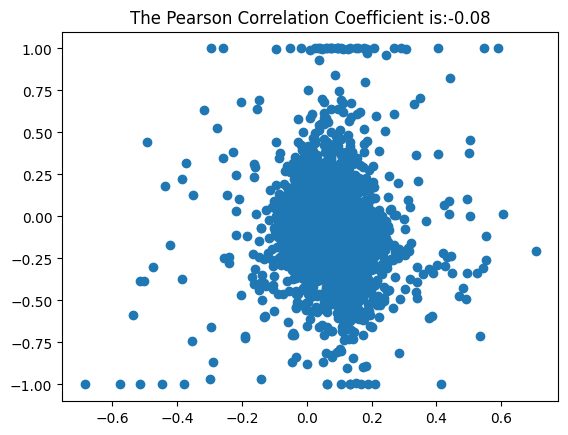

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


pdf =cadf.dropna().copy()
pdf = pdf[pdf["last_1day_amp"]>0.1]
y = pdf.pop("change")
pdf.drop(columns=["code","name","date"],inplace=True)
X = pdf
test_prediction_gb = best_gb.predict(X)

print(f"MSE is: {mean_squared_error(y*10, test_prediction_gb*10)}")
res = pearsonr(test_prediction_gb, y)
print(f"The Pearson Correlation Coefficient is:{res[0]:.2f}")

res = pearsonr(test_prediction_gb, y)
plt.scatter(test_prediction_gb, y)
plt.title(f"The Pearson Correlation Coefficient is:{res[0]:.2f}")
plt.show()

In [16]:
pdf = cadf.copy()
pdf = pdf[pdf["last_1day_amp"]>0.1]
ctrain = pdf.drop(columns=["code","name","date","change"])
pdf["pred"] = random_search.predict(ctrain)*10
pdf["change"] = pdf["change"]*10
pdf = pdf[["date","code","name","pred","change","last_1day_change","last_1day_vchange","last_1day_volume"]]
# pdf[(pdf.last_1day_change>-8)&(pdf.last_1day_change<8)].sort_values(by="pred",ascending=False)[:10]
# pdf[(pdf.last_1day_change>3)&(pdf.last_1day_change<8)].sort_values(by="pred",ascending=False)[:20]
pdf[(pdf.change<5)&(pdf.change>2)].sort_values(by="pred",ascending=False)[:100]

,date,code,name,pred,change,last_1day_change,last_1day_vchange,last_1day_volume
2678,2024-12-30,sz002596,海南瑞泽,5.031202,4.571429,10.062893,2.233162,0.694964
2065,2024-12-30,sz001217,华尔泰,5.010860,3.772189,10.008137,2.153815,1.379866
2585,2024-12-30,sz002491,通鼎互联,4.041687,3.738318,-1.834862,4.862940,6.401463
3733,2024-12-30,sz300727,润禾材料,3.415527,2.105263,-6.014059,1.296145,5.085847
901,2024-12-30,sh601798,蓝科高新,3.380120,3.636364,10.000000,1.205838,1.270490
...,...,...,...,...,...,...,...,...
4099,2024-12-30,sz301119,正强股份,0.503563,3.162310,-1.930380,0.989010,1.284480
2079,2024-12-30,sz001238,浙江正特,0.485727,3.041825,0.000000,1.115073,0.989852
2068,2024-12-30,sz001222,源飞宠物,0.452265,2.242152,1.166559,1.147321,0.545202
462,2024-12-30,sh600635,大众公用,0.435652,2.022472,3.009259,2.595396,4.093510


In [14]:
pdf[pdf.name=="齐心集团"]